This notebook aims to analyse and interpret the dataset containing information related to european call and put options

In [4]:
# Importation of the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
chemin_dev = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if chemin_dev not in sys.path:
    sys.path.append(chemin_dev)


In [5]:
# We load the data that have been previously processed
df_options = pd.read_csv("../../data/options/options_processed.csv")


In [6]:
df_options.shape

(945505, 17)

In [22]:
# Five first rows of the dataset 
df_options.head()

,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,theta,vega,rho,price,stock_price,time_to_maturity,interest_rate
0,2019-05-10,A,2019-05-17,65.0,Call,10.10,13.35,0.5636,0.9873,0.0055,-0.0185,0.0035,0.0122,11.725,76.64,0.019178,0.0242
1,2019-05-10,A,2019-05-17,65.0,Put,0.01,0.07,0.5636,-0.0127,0.0055,-0.0141,0.0035,-0.0002,0.040,76.64,0.019178,0.0242
2,2019-05-10,A,2019-05-17,70.0,Call,6.60,7.70,0.3212,0.9863,0.0102,-0.0133,0.0037,0.0132,7.150,76.64,0.019178,0.0242
3,2019-05-10,A,2019-05-17,70.0,Put,0.21,0.24,0.5252,-0.0850,0.0278,-0.0619,0.0166,-0.0013,0.225,76.64,0.019178,0.0242
4,2019-05-10,A,2019-05-17,72.5,Call,5.05,5.25,0.4973,0.8252,0.0486,-0.1018,0.0275,0.0112,5.150,76.64,0.019178,0.0242


In [9]:
# Selection of the quantitative variables
df_options_quant = df_options.select_dtypes(include=[np.number])
# We drop unnecessary columns (target columns is the mean of the bid and ask columns)
df_options_quant.drop(columns=["bid", "ask"], inplace=True)

In [10]:
df_options_quant.describe()


,strike,vol,delta,gamma,theta,vega,rho,price,stock_price,time_to_maturity,interest_rate
count,945505.000000,945505.000000,945505.000000,945505.000000,945505.000000,945505.000000,945505.000000,945505.000000,945505.000000,945505.000000,945505.000000
mean,107.821186,0.312318,0.009382,0.063156,-0.039235,0.072430,0.003889,5.343413,107.984084,0.082814,0.015820
std,161.199663,0.192886,0.600812,0.100028,0.099244,0.144965,0.085639,11.617255,160.630556,0.048011,0.001571
min,0.500000,-1.000000,-1.000000,0.000000,-9.909400,0.000000,-2.134200,0.005000,0.440000,0.000000,0.015000
25%,35.000000,0.217200,-0.466100,0.011800,-0.042400,0.009900,-0.012100,0.500000,35.990000,0.038356,0.015300
50%,67.000000,0.282900,0.000000,0.034200,-0.018700,0.034300,0.000000,2.075000,67.540000,0.076712,0.015500
75%,126.000000,0.377800,0.517700,0.077900,-0.006300,0.083200,0.015400,6.000000,127.120000,0.120548,0.015700
max,2500.000000,6.000000,1.000000,5.289700,0.000000,3.628900,2.990500,348.600000,2167.800000,0.273973,0.024300


<Axes: xlabel='time_to_maturity', ylabel='Count'>

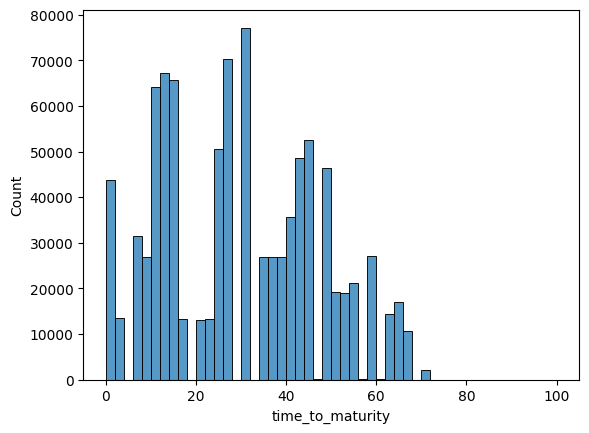

In [12]:
sns.histplot(df_options_quant["time_to_maturity"]*365, bins=50)

<Axes: xlabel='price', ylabel='Count'>

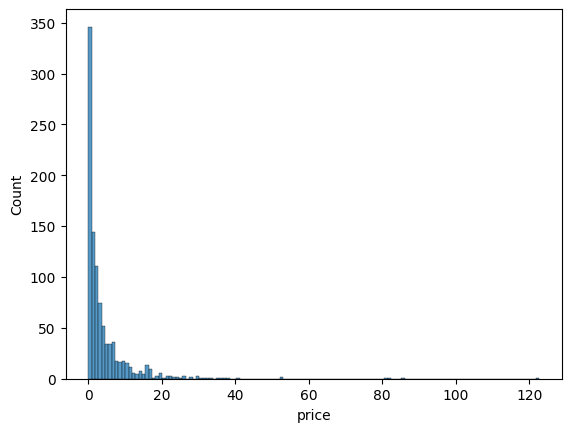

In [37]:
sns.histplot(df_options_quant["price"])

<Axes: ylabel='price'>

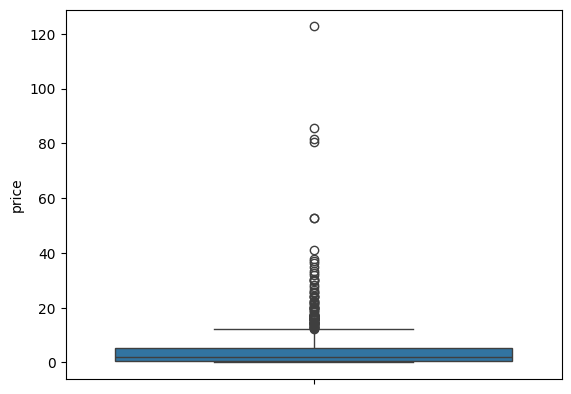

In [38]:
sns.boxplot(data=df_options_quant.price)

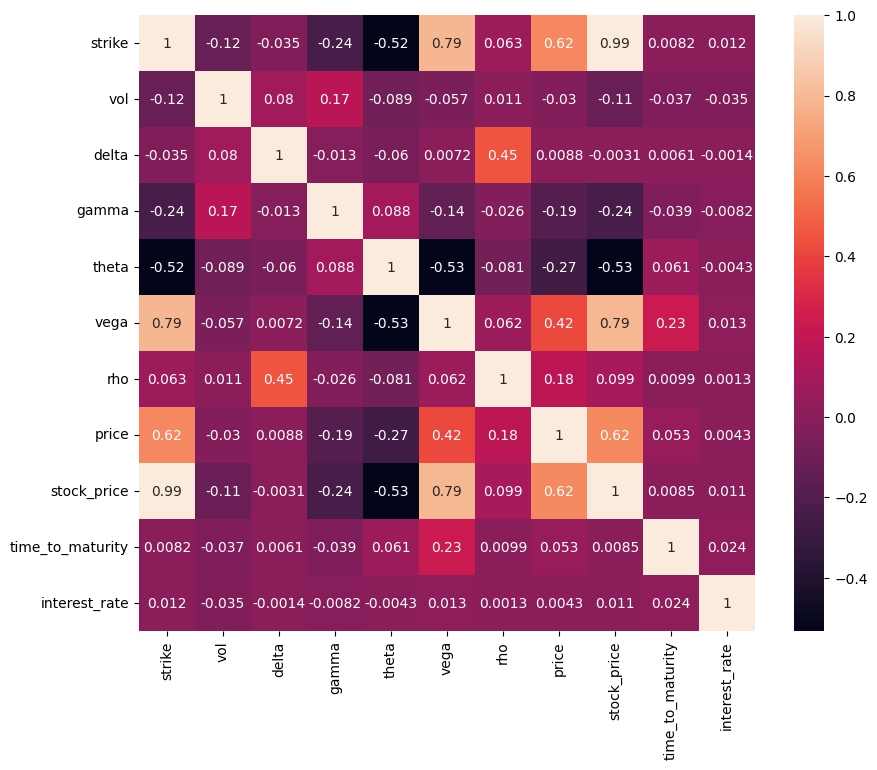

In [18]:
import matplotlib.pyplot as plt

corr = df_options_quant.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(corr, square=True, annot=True)
plt.show()


Explained Variance Ratio: [0.32795902 0.13363016 0.10709939 0.09519195 0.09024121 0.07425222
 0.06756067 0.04773757 0.03923521 0.01668054]


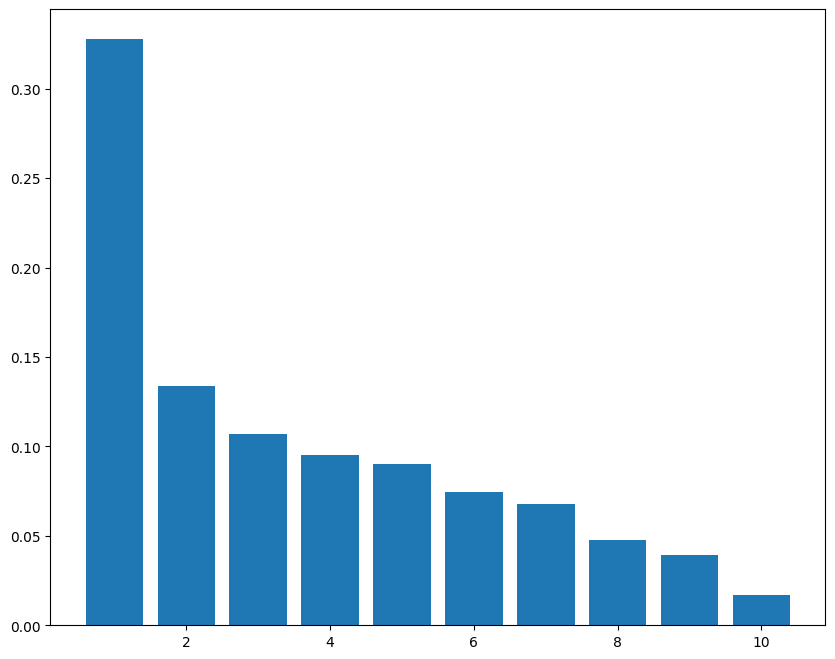

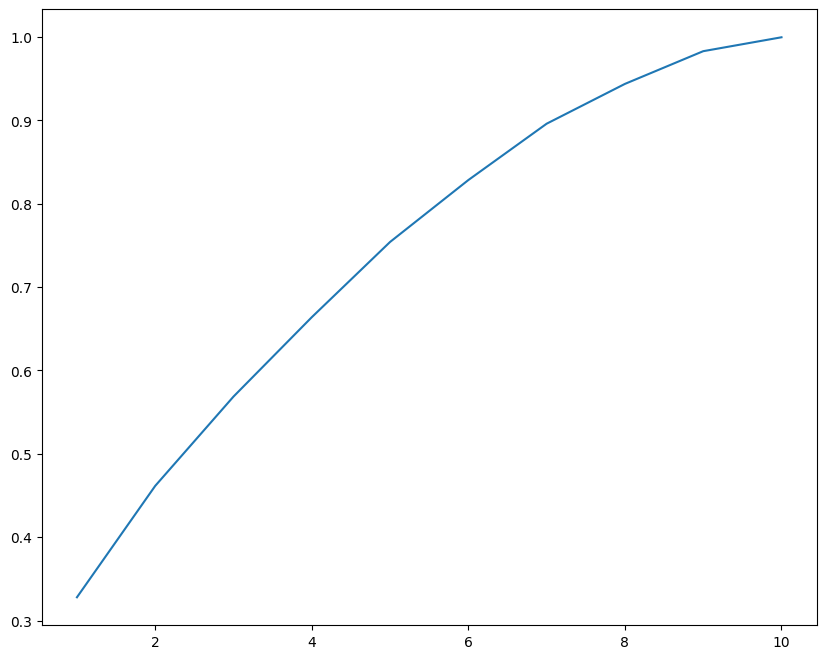

In [14]:
# Créer une instance de PCA
pca = PCA(n_components=10)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Center and scale the data
options_quant_scaled = scaler.fit_transform(df_options_quant)

# Appliquer l'ACP sur les données
options_quant_pca = pca.fit_transform(options_quant_scaled)

# Afficher les résultats de l'ACP
explained_variance_ratio = pca.explained_variance_ratio_
# Plot bar chart
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)


print("Explained Variance Ratio:", explained_variance_ratio)

# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)


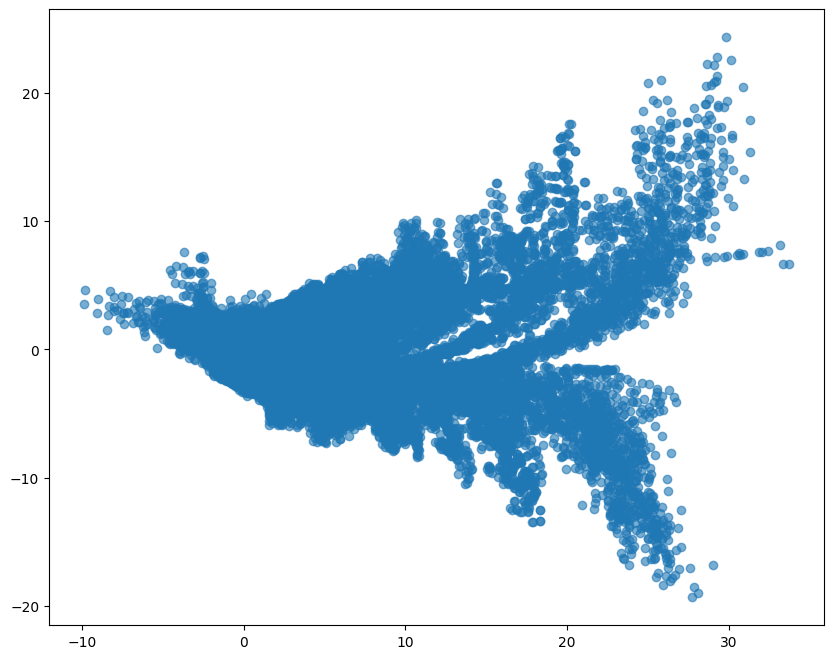

In [21]:
# plot 3 premieres composantes : 
plt.figure(figsize=(10, 8))
plt.scatter(options_quant_pca[:, 0], options_quant_pca[:, 1], alpha=0.6)
# Créer une carte de chaleur avec les coordonnées et les valeurs